In [1]:
# === 0. LIBRERÍAS BÁSICAS ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# === 0.1 LIBRERÍAS de conexión a la DB ===
import gspread
import google.auth
from google.colab import auth
from google.auth.transport.requests import Request
from google.oauth2.service_account import Credentials
import ipywidgets as widgets
from IPython.display import display, clear_output

### Conexión con el sheets

In [4]:
auth.authenticate_user()

# Conecta usando permisos de Google Drive y Sheets
SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly',
          'https://www.googleapis.com/auth/drive']

creds, _ = google.auth.default(scopes=SCOPES)

# Autoriza gspread
gc = gspread.authorize(creds)
url = "https://docs.google.com/spreadsheets/d/1GuWnVbYOsWYxId0lwGVjt0l0w4MKasdzVuaky9H5EW0/edit"
spreadsheet = gc.open_by_url(url)
worksheet = spreadsheet.worksheet("respuestas")
df = pd.DataFrame(worksheet.get_all_records())
df.head()




,Marca temporal,Dirección de correo electrónico,Nombre,Edad,¿En qué zona vivís?,Ocupación,¿Cómo nos conociste?,¿Con qué frecuencia asistís a estas varietés?,¿Asistís a eventos similares de otros centros culturales?,¿Colaboraste con la gorra?,¿Consumiste algo en la barra?,¿Qué es lo que más te gusta de La Gran Siete?,¿Qué mejorarías en estos eventos?
0,5/04/2025 17:06:36,lascoursnicolas@gmail.com,Nicolás Lascours,1983,La Loma,Docente,Invitado por alguien del espacio,Es mi primera vez,No,Sí - con QR / transferencia,Sí,Ambiente y comunidad,La comida
1,9/04/2025 17:06:36,maria.gonzalez@mail.com,Maria Gonzalez,1990,Palermo,Diseñadora gráfica,Redes Sociales,Ocasionalmente,Ocasionalmente,Sí - con QR / transferencia,Sí,Los espectáculos,Más variedad en los espectáculos
2,10/04/2025 17:06:36,juan.perez@mail.com,Juan Pérez,1985,Caballito,Contador,Amigos / Familiares,Frecuentemente,Frecuentemente,Sí - en efectivo,No,Ambiente y comunidad,Nada
3,11/04/2025 17:06:36,laura.smith@mail.com,Laura Smith,1998,Almagro,Estudiante,Volantes / carteles,Es mi primera vez,No,No pude,Sí,Los talleres,Más talleres interactivos
4,12/04/2025 17:06:36,carlos.rodriguez@mail.com,Carlos Rodríguez,1982,Belgrano,Ingeniero,Invitado por alguien del espacio,Ocasionalmente,Ocasionalmente,Sí - en efectivo,Sí,La calidad/precios de los alimentos/bebidas,Más opciones vegetarianas


### Botoón para actualizar todo el procesamiento automáticamente

In [5]:
# Botón para actualizar
boton_actualizar = widgets.Button(description="🔄 Actualizar datos y gráfico")

# Función al hacer clic
def on_click(b):
    clear_output(wait=True)  # Limpia la salida anterior (opcional)
    display(boton_actualizar)

    # Leer datos
    spreadsheet = gc.open_by_url(url)
    worksheet = spreadsheet.get_worksheet(0)  # o worksheet("Nombre exacto")
    df = pd.DataFrame(worksheet.get_all_records())

    print(f"Datos actualizados. Total de respuestas: {df.shape[0]}")

# Enlazar botón con función
boton_actualizar.on_click(on_click)
display(boton_actualizar)

Button(description='🔄 Actualizar datos y gráfico', style=ButtonStyle())

### Verifico las keys del header y elimino las que no serán analizadas

In [6]:
df.keys()

Index(['Marca temporal', 'Dirección de correo electrónico', 'Nombre', 'Edad',
       '¿En qué zona vivís?', 'Ocupación', '¿Cómo nos conociste?',
       '¿Con qué frecuencia asistís a estas varietés?',
       '¿Asistís a eventos similares de otros centros culturales?',
       '¿Colaboraste con la gorra?', '¿Consumiste algo en la barra?',
       '¿Qué es lo que más te gusta de La Gran Siete?',
       '¿Qué mejorarías en estos eventos?'],
      dtype='object')

In [7]:
def extraer_anio(valor):
    try:
        if pd.isna(valor):
           return np.nan
        return int(str(valor)[:4])
    except:
        return np.nan
df['Año_Nacimiento_Clean'] = df['Edad'].apply(extraer_anio)
df['Edad'] = 2025 - df['Año_Nacimiento_Clean']

bins = [0, 20, 30, 40, 50, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50+']
df['Grupo_Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels)

In [8]:
df_clean = df.drop(columns=['¿Qué mejorarías en estos eventos?','Año_Nacimiento_Clean','Edad','Marca temporal', 'Dirección de correo electrónico', 'Nombre', ])
df_clean.keys()

Index(['¿En qué zona vivís?', 'Ocupación', '¿Cómo nos conociste?',
       '¿Con qué frecuencia asistís a estas varietés?',
       '¿Asistís a eventos similares de otros centros culturales?',
       '¿Colaboraste con la gorra?', '¿Consumiste algo en la barra?',
       '¿Qué es lo que más te gusta de La Gran Siete?', 'Grupo_Edad'],
      dtype='object')

Graficando: ¿En qué zona vivís?


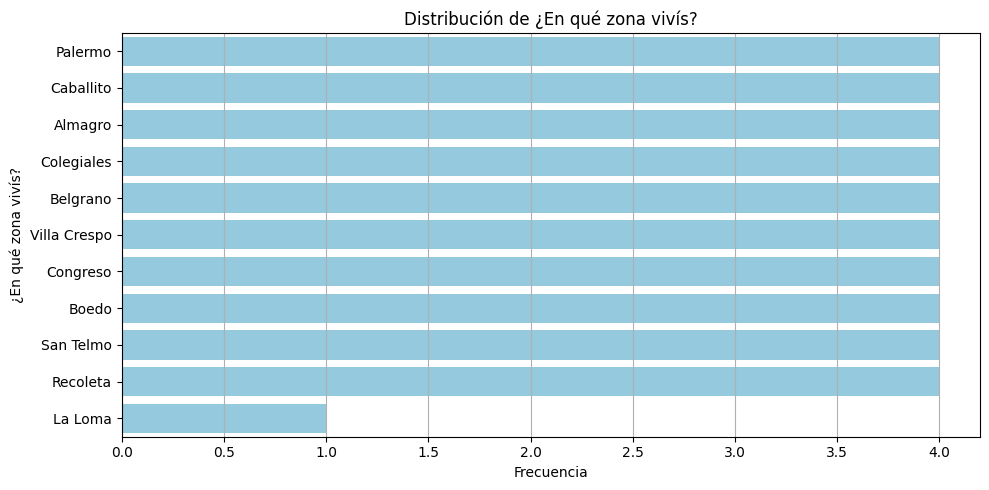

Graficando: Ocupación


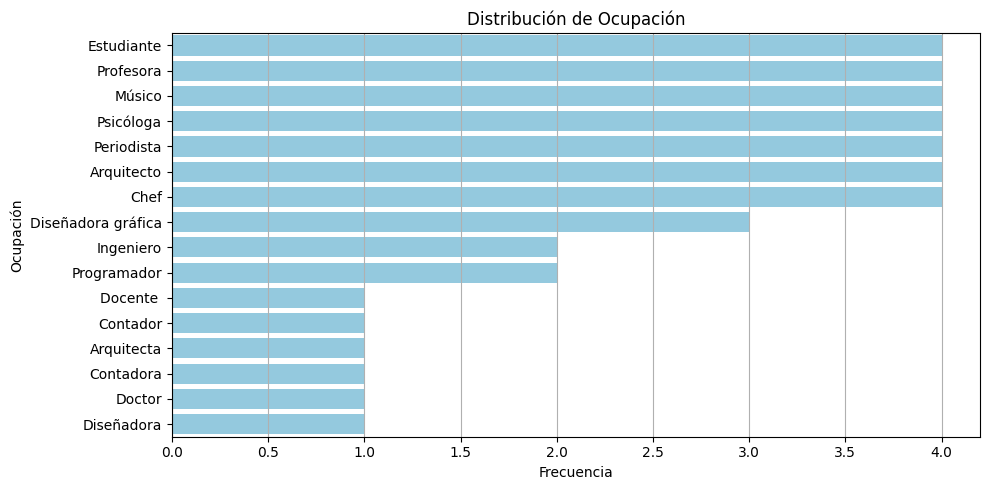

Graficando: ¿Cómo nos conociste?


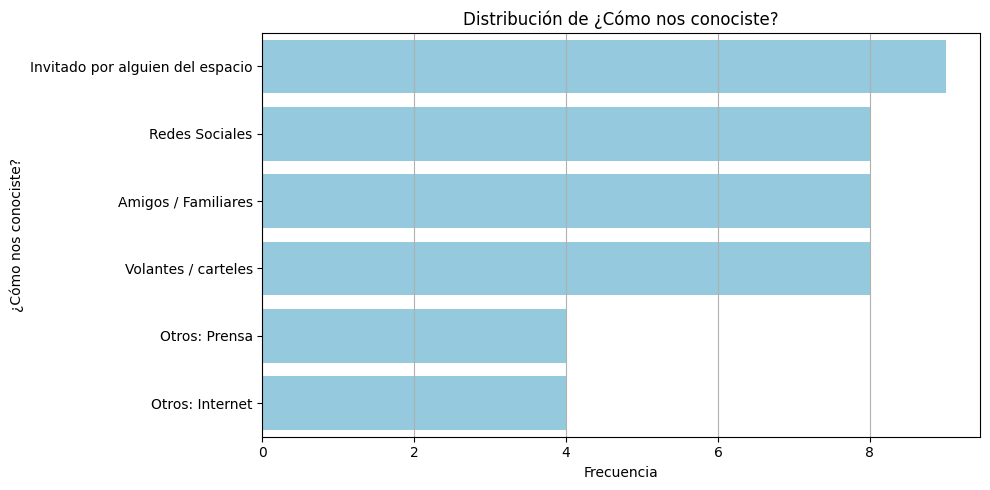

Graficando: ¿Con qué frecuencia asistís a estas varietés?


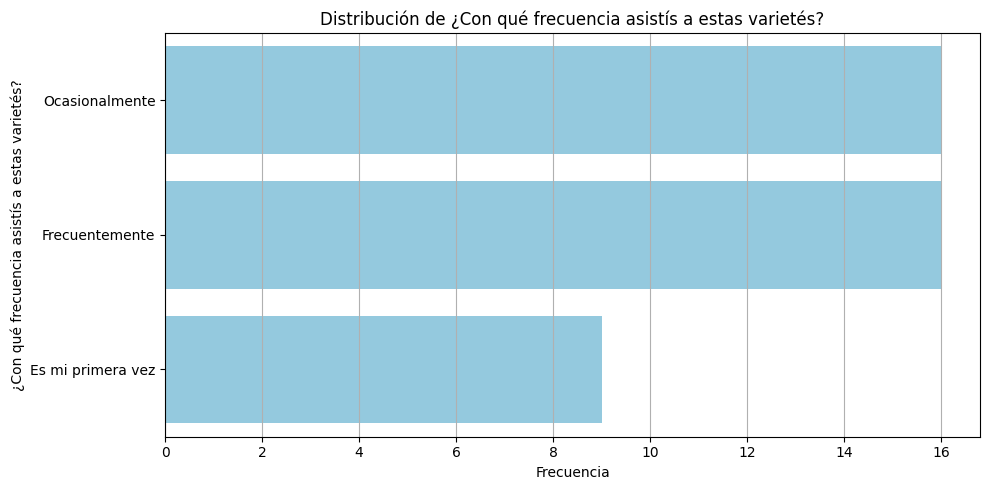

Graficando: ¿Asistís a eventos similares de otros centros culturales?


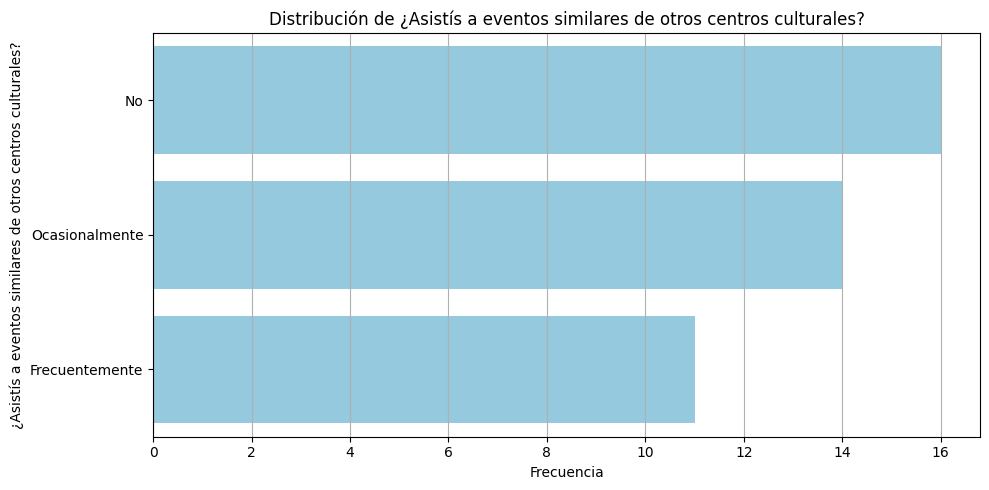

Graficando: ¿Colaboraste con la gorra?


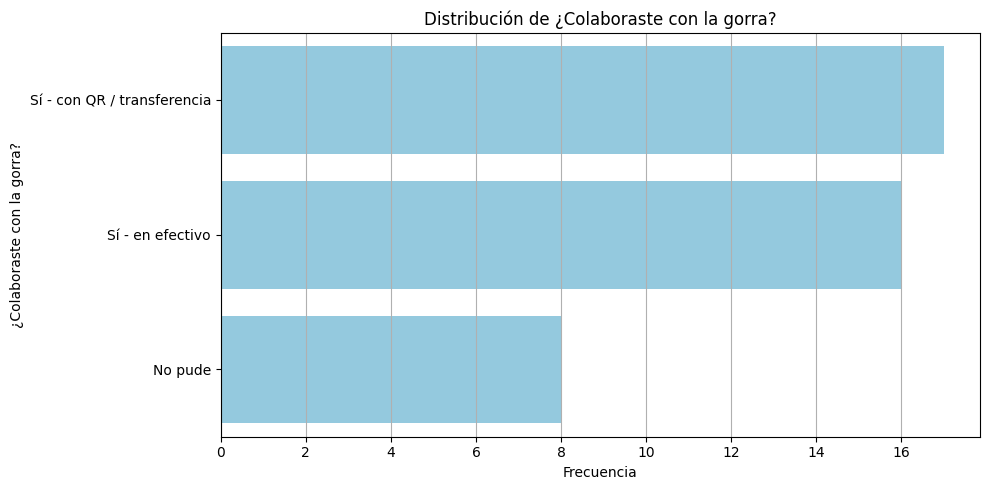

Graficando: ¿Consumiste algo en la barra?


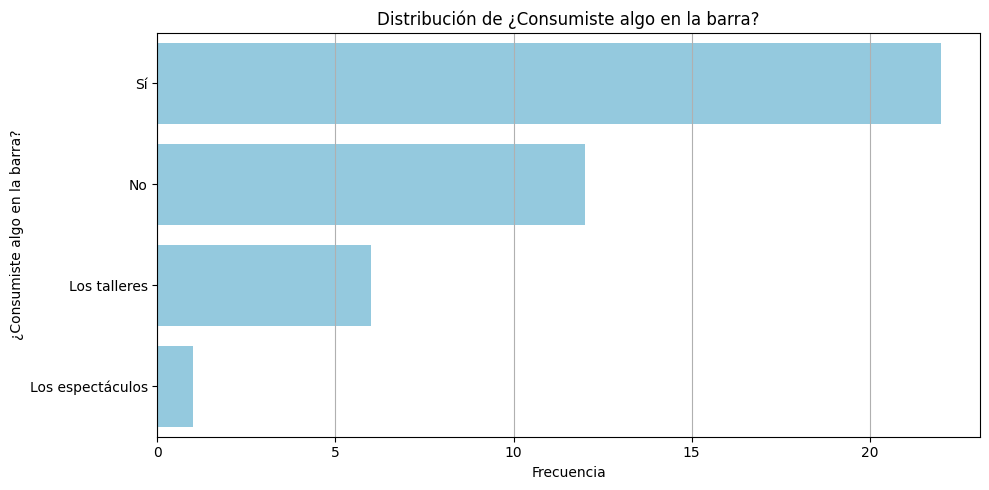

Graficando: ¿Qué es lo que más te gusta de La Gran Siete?


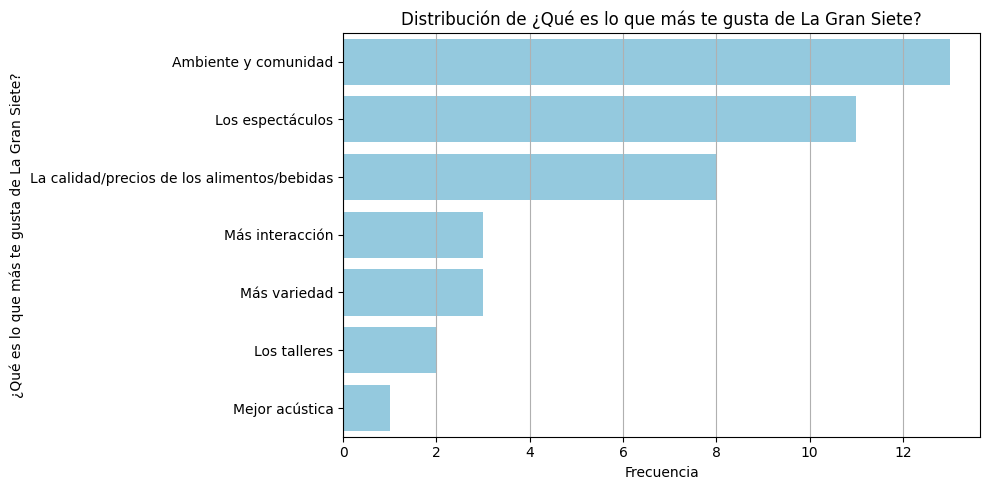

<ipython-input-9-ad143ffb80b6>:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df_clean[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df_clean[column]):


Graficando: Grupo_Edad


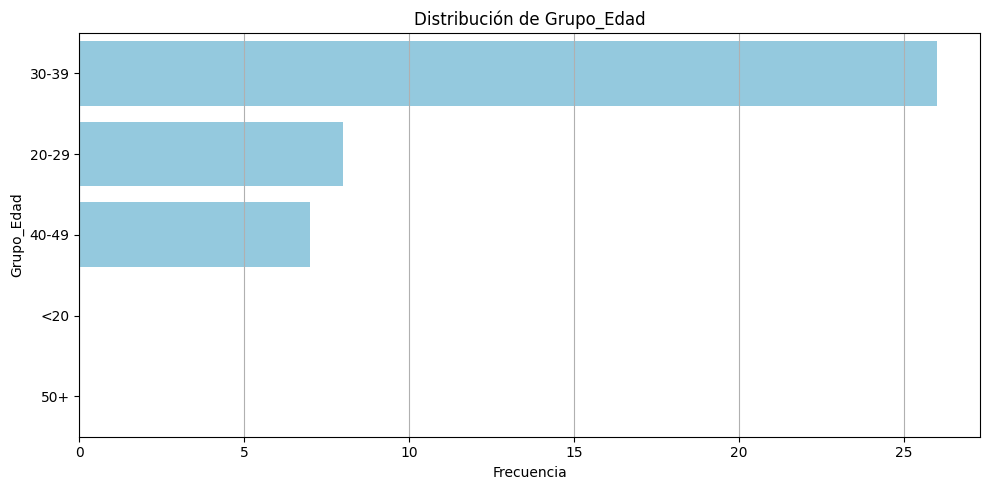

In [9]:
# Graficos de barras horizontales
for column in df_clean.columns:
    if df_clean[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df_clean[column]):
        print(f"Graficando: {column}")
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df_clean, y=column, order=df_clean[column].value_counts().index, color='skyblue')
        plt.title(f'Distribución de {column}')
        plt.xlabel('Frecuencia')
        plt.ylabel(column)
        plt.grid(axis='x')
        plt.tight_layout()
        plt.show()


<ipython-input-10-ab807e9a99cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=column, palette='viridis')  # Graficar las categorías


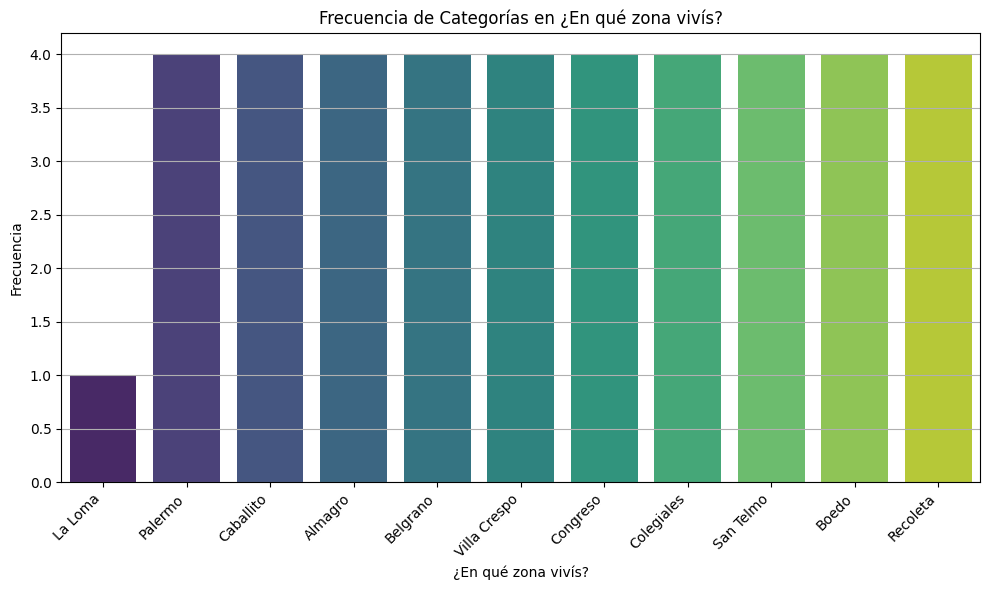

<ipython-input-10-ab807e9a99cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=column, palette='viridis')  # Graficar las categorías


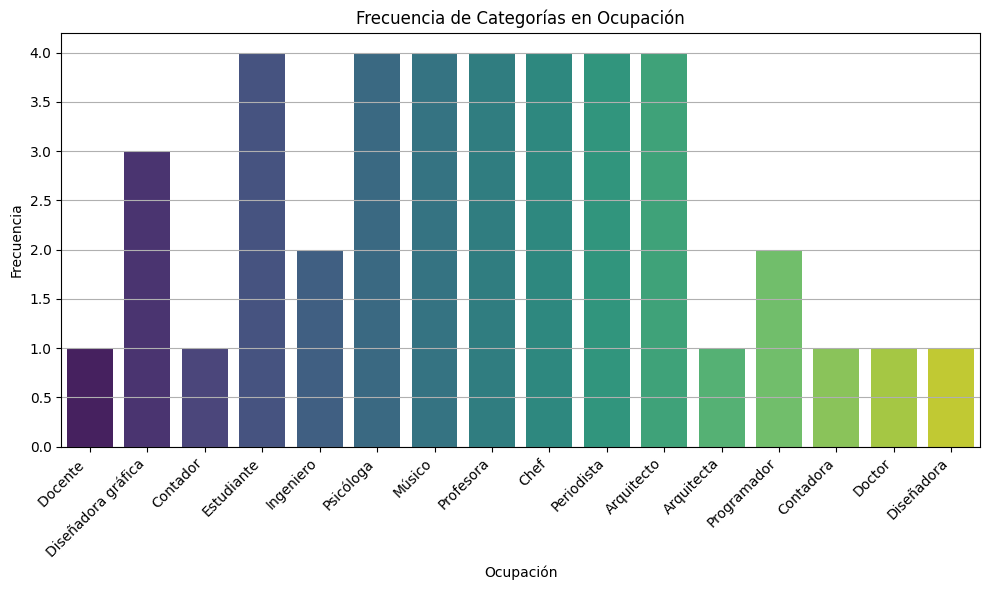

<ipython-input-10-ab807e9a99cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=column, palette='viridis')  # Graficar las categorías


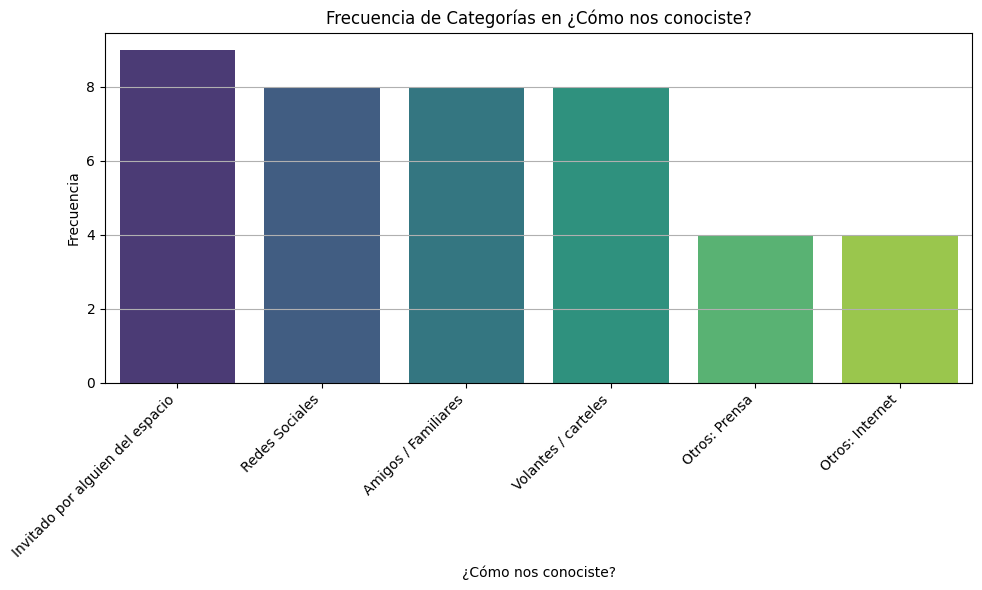

<ipython-input-10-ab807e9a99cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=column, palette='viridis')  # Graficar las categorías


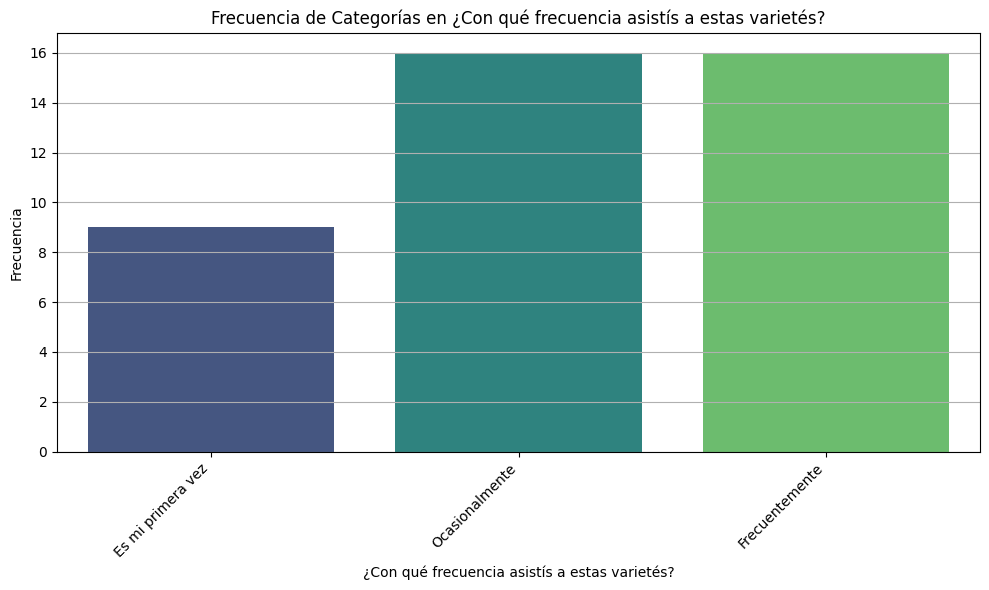

<ipython-input-10-ab807e9a99cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=column, palette='viridis')  # Graficar las categorías


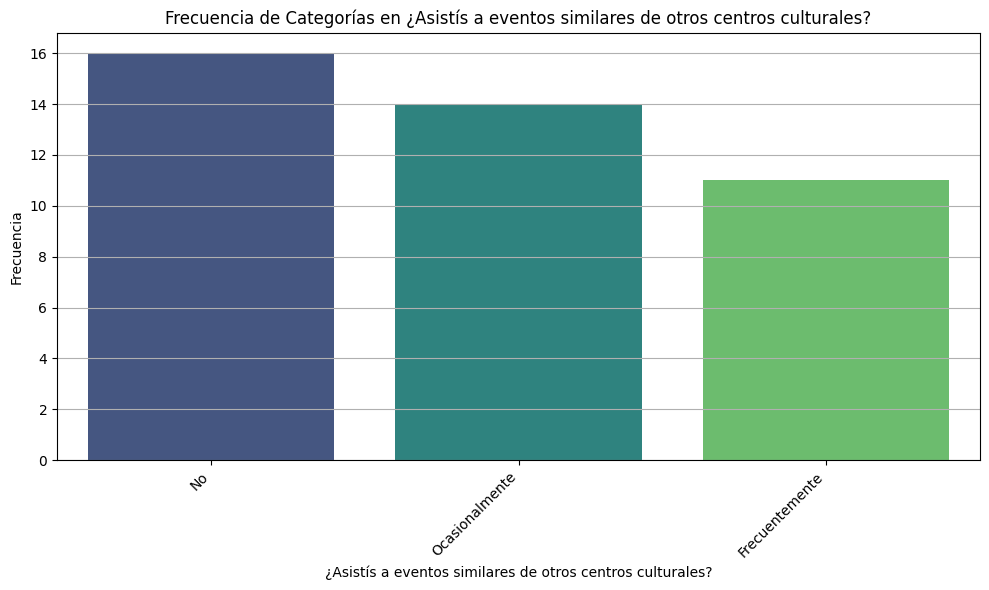

<ipython-input-10-ab807e9a99cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=column, palette='viridis')  # Graficar las categorías


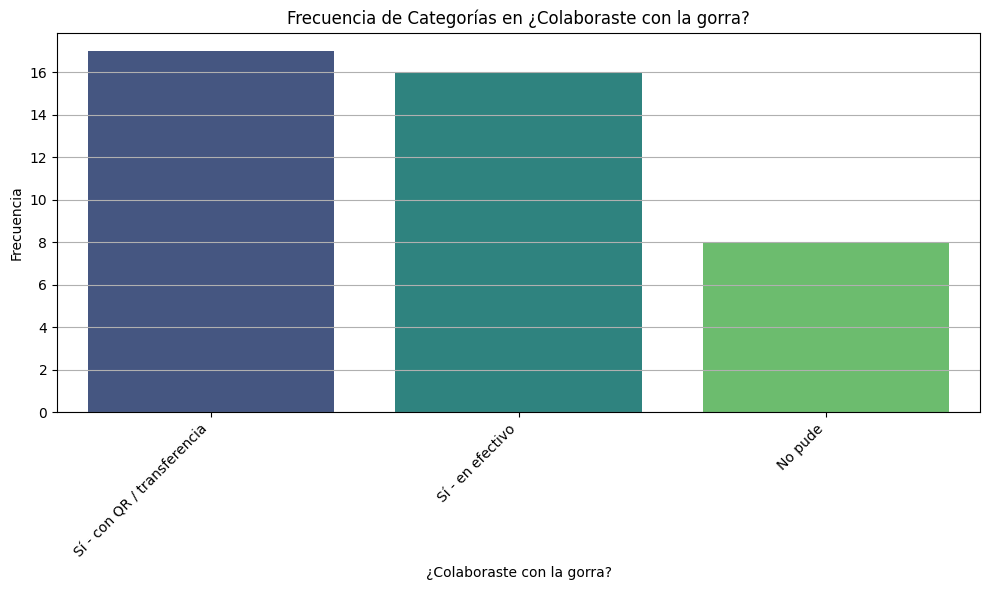

<ipython-input-10-ab807e9a99cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=column, palette='viridis')  # Graficar las categorías


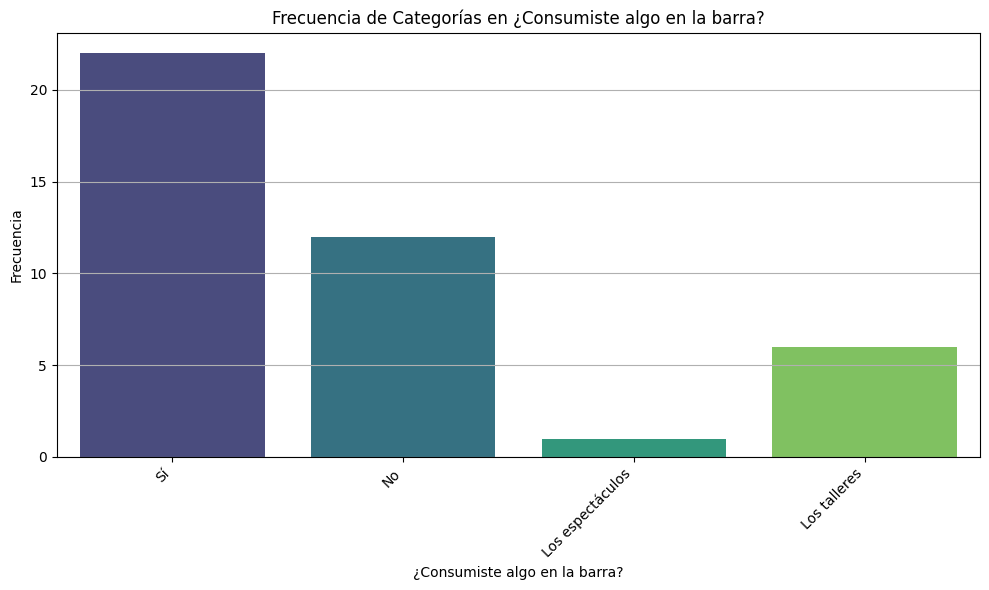

<ipython-input-10-ab807e9a99cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=column, palette='viridis')  # Graficar las categorías


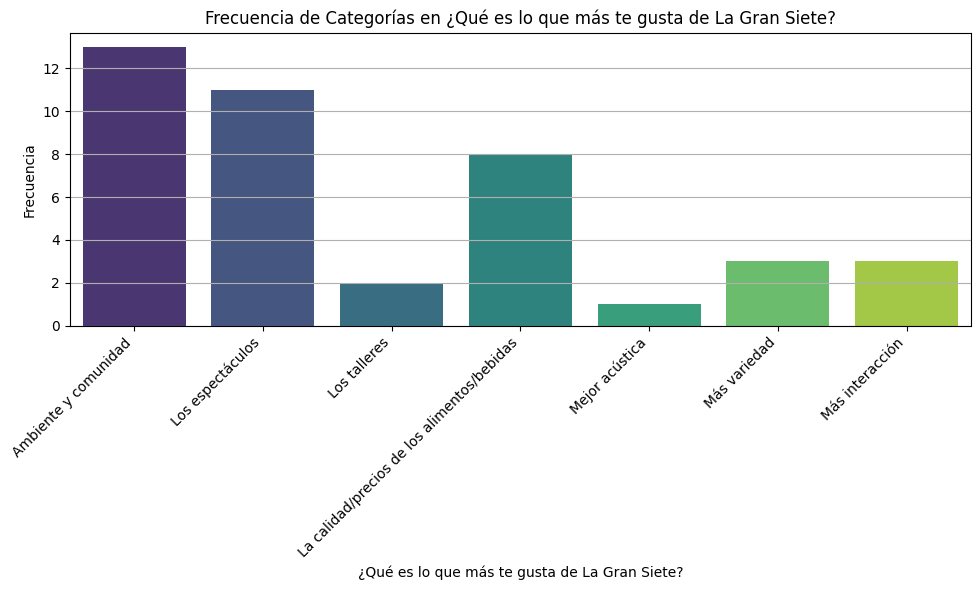

In [10]:
# Graficos de barras verticales
for column in df_clean.columns:
    if df_clean[column].dtype == 'object':  # Verifica si la columna es categórica
        plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
        sns.countplot(data=df_clean, x=column, palette='viridis')  # Graficar las categorías
        plt.title(f'Frecuencia de Categorías en {column}')  # Título del gráfico
        plt.xlabel(column)  # Etiqueta del eje x
        plt.ylabel('Frecuencia')  # Etiqueta del eje y
        plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor visualización
        plt.grid(True, axis='y')  # Mostrar la cuadrícula solo en el eje y para claridad
        plt.tight_layout()  # Ajustar el gráfico para evitar superposiciones
        plt.show()  # Mostrar el gráfico

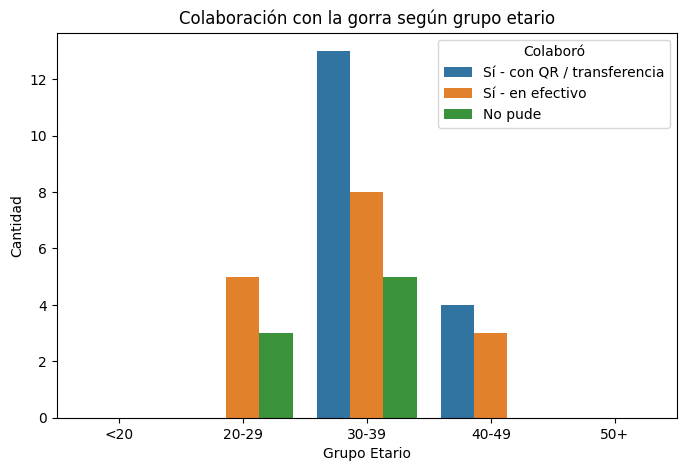

In [11]:
# 4.1. Gorra vs Grupo Etario
plt.figure(figsize=(8,5))
sns.countplot(data=df_clean, x='Grupo_Edad', hue='¿Colaboraste con la gorra?')
plt.title('Colaboración con la gorra según grupo etario')
plt.xlabel('Grupo Etario')
plt.ylabel('Cantidad')
plt.legend(title='Colaboró')
plt.show()

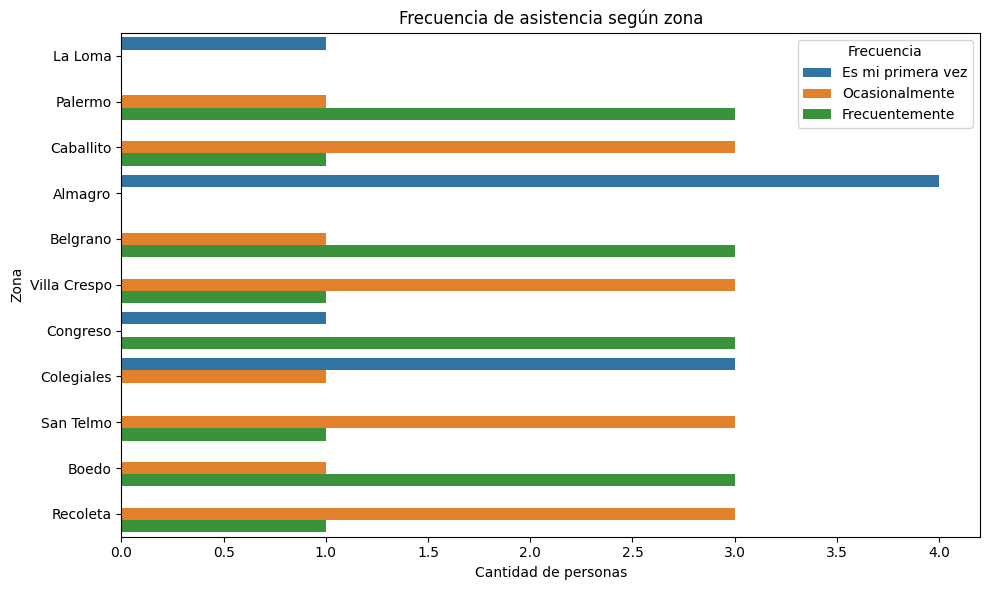

In [12]:
# 4.2. Frecuencia de asistencia vs Zona
plt.figure(figsize=(10,6))
sns.countplot(data=df_clean, y='¿En qué zona vivís?', hue='¿Con qué frecuencia asistís a estas varietés?')
plt.title('Frecuencia de asistencia según zona')
plt.xlabel('Cantidad de personas')
plt.ylabel('Zona')
plt.legend(title='Frecuencia')
plt.tight_layout()
plt.show()

<ipython-input-13-5b6a7b486f42>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


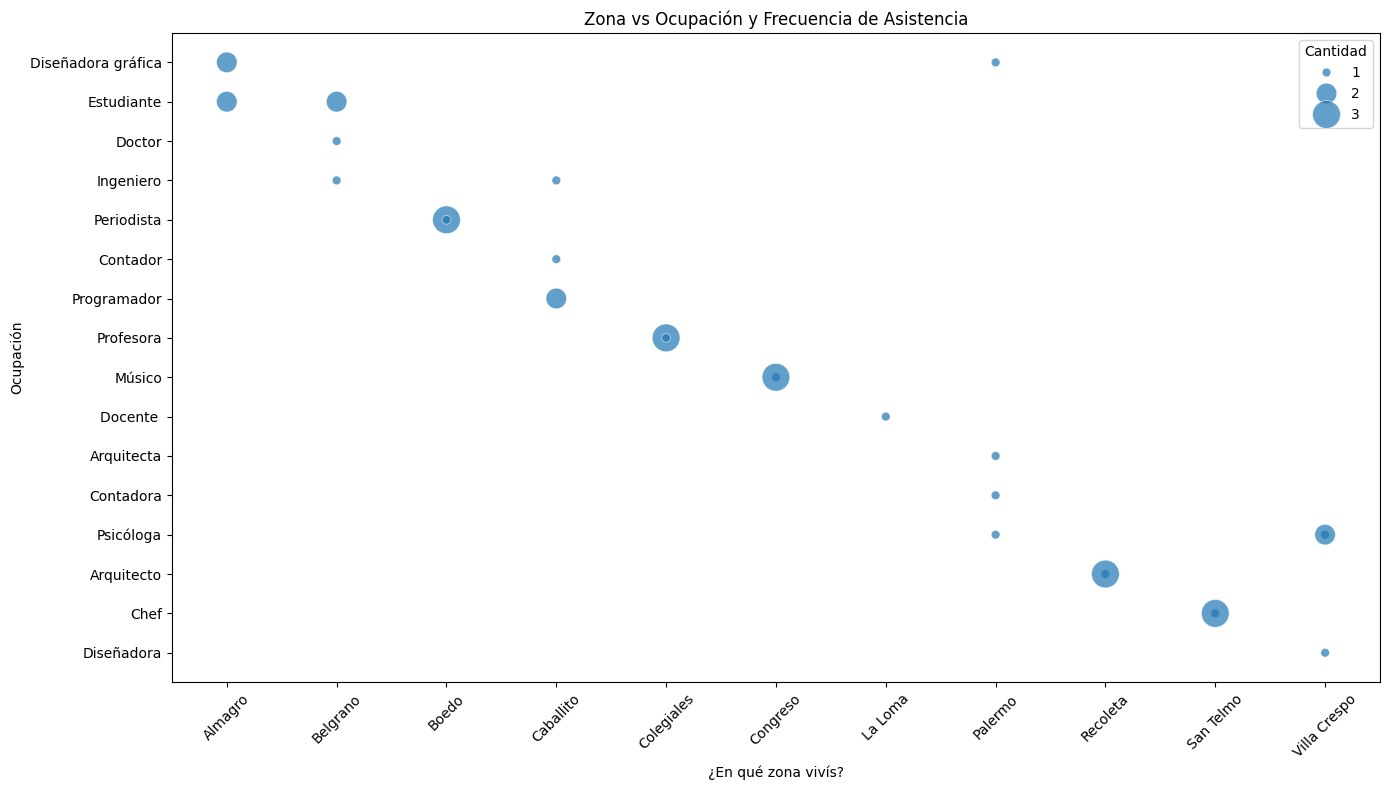

In [13]:
# Tabulación de 3 variables
tabla = df_clean.groupby(['¿En qué zona vivís?', 'Ocupación', '¿Con qué frecuencia asistís a estas varietés?']).size().reset_index(name='Cantidad')

plt.figure(figsize=(14,8))
sns.scatterplot(
    data=tabla,
    x='¿En qué zona vivís?',
    y='Ocupación',
    size='Cantidad',
    #hue='¿Con qué frecuencia asistís a estas varietés?',
    sizes=(40, 400),
    palette='viridis',
    alpha=0.7
)
plt.title('Zona vs Ocupación y Frecuencia de Asistencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


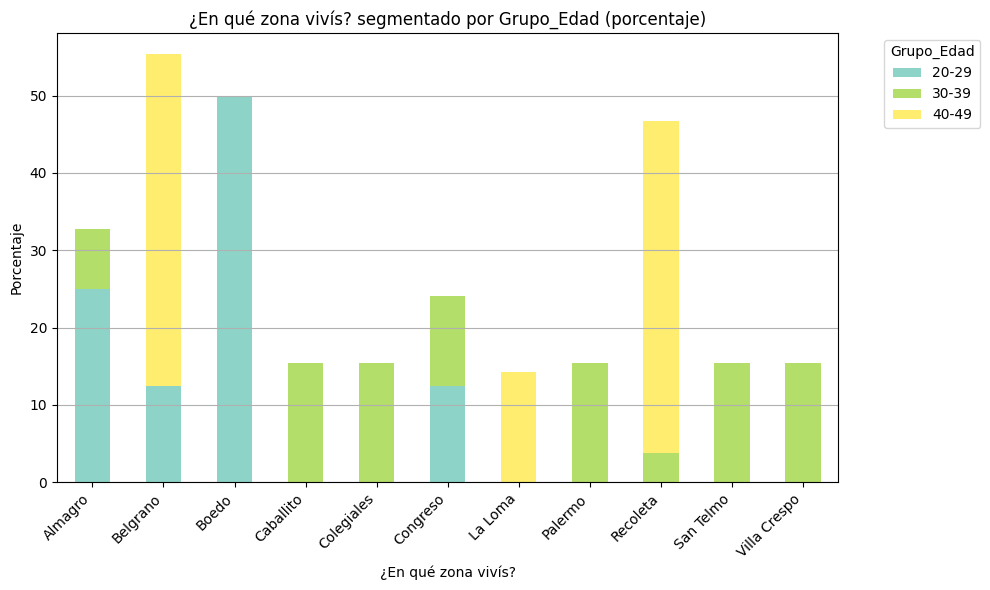

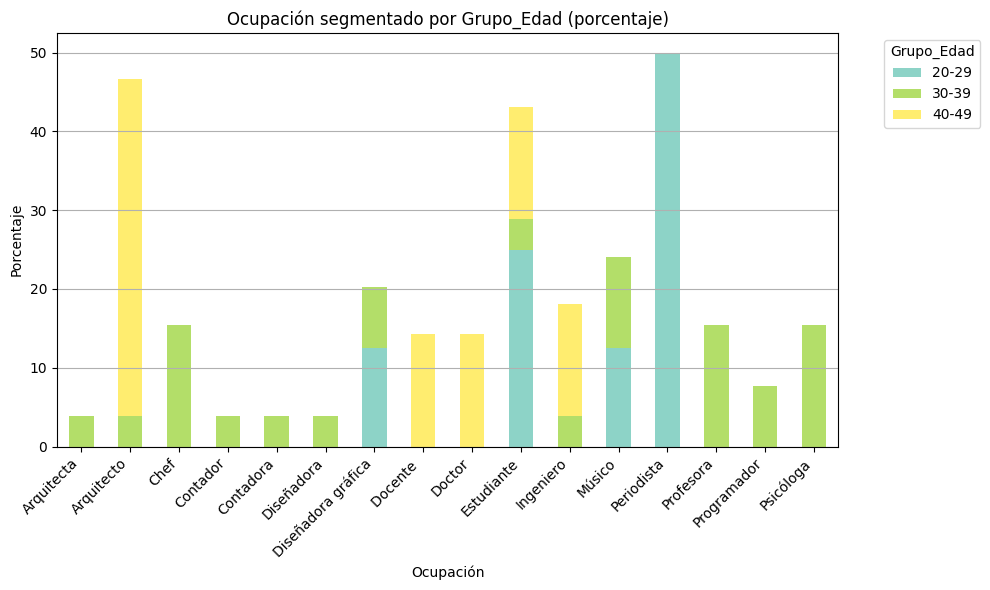

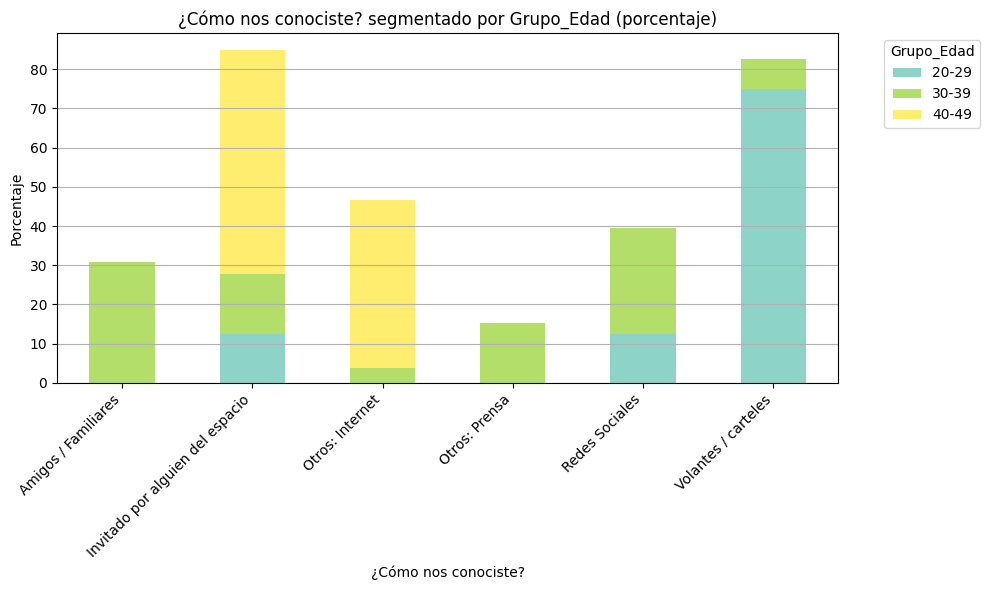

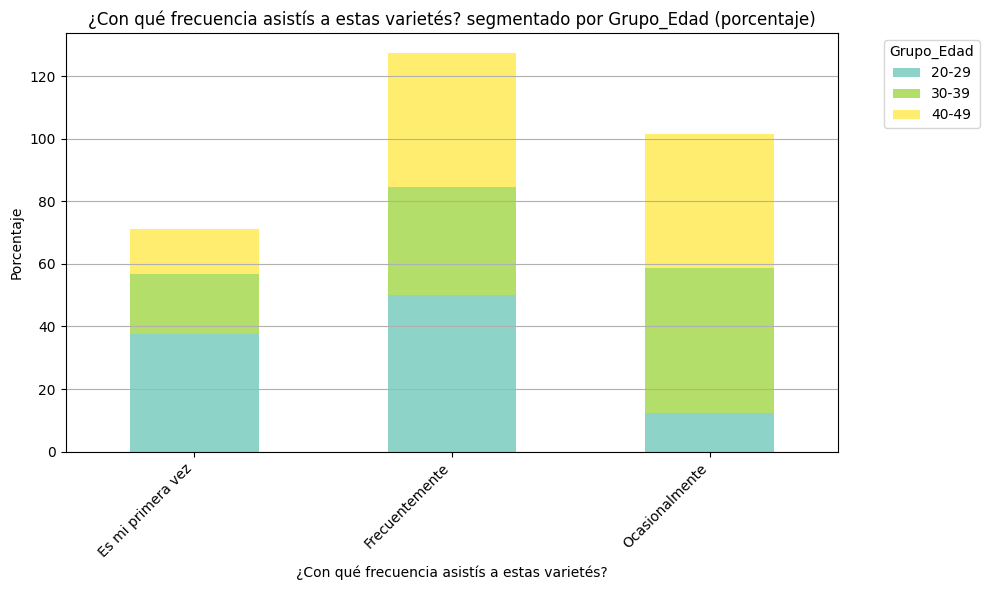

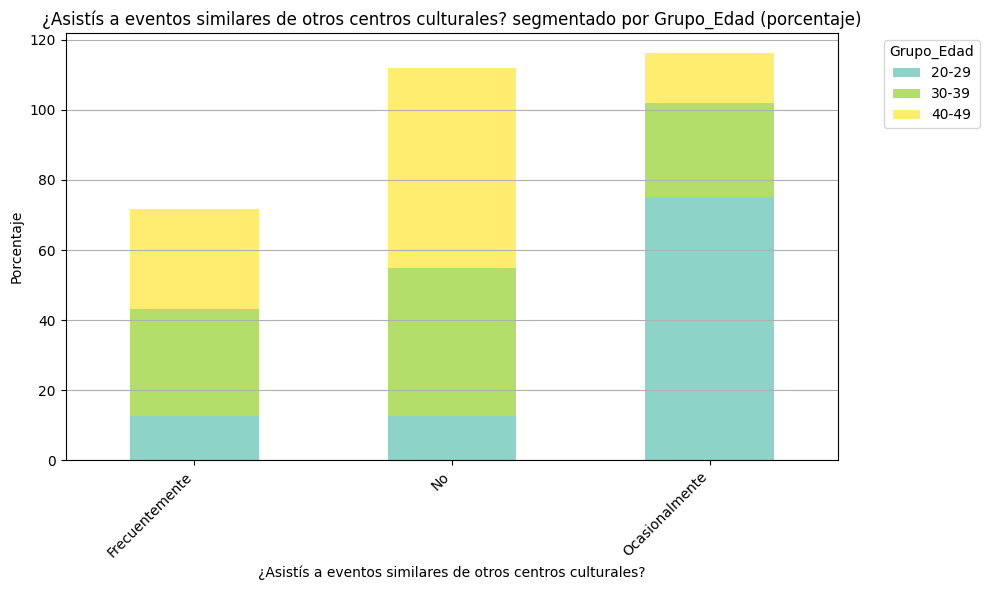

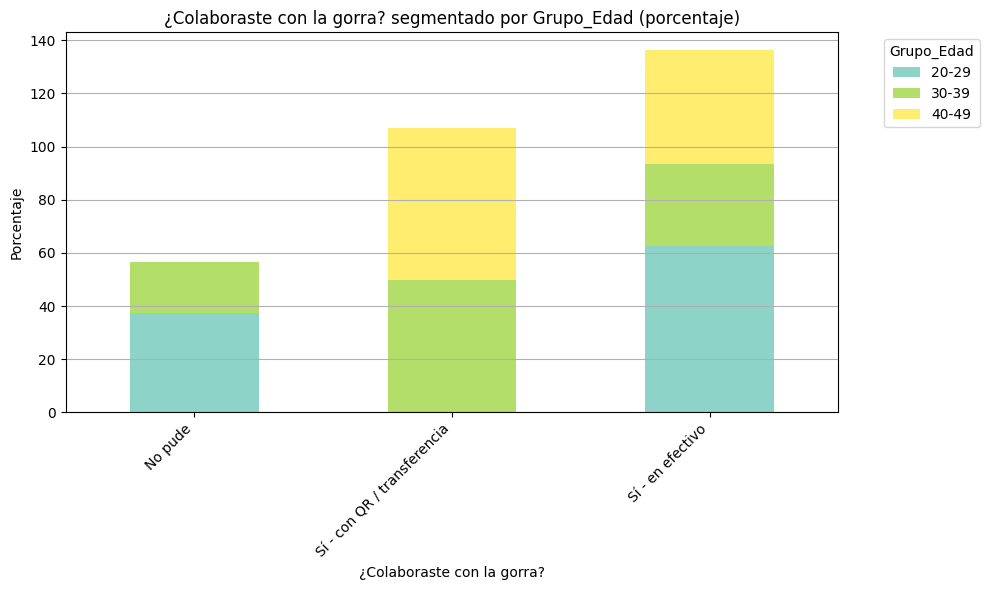

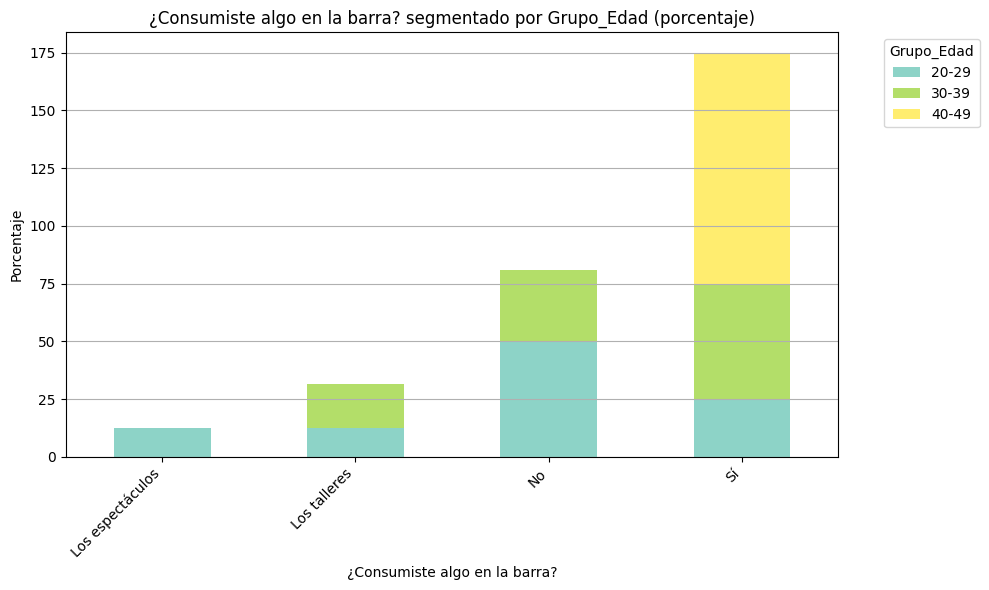

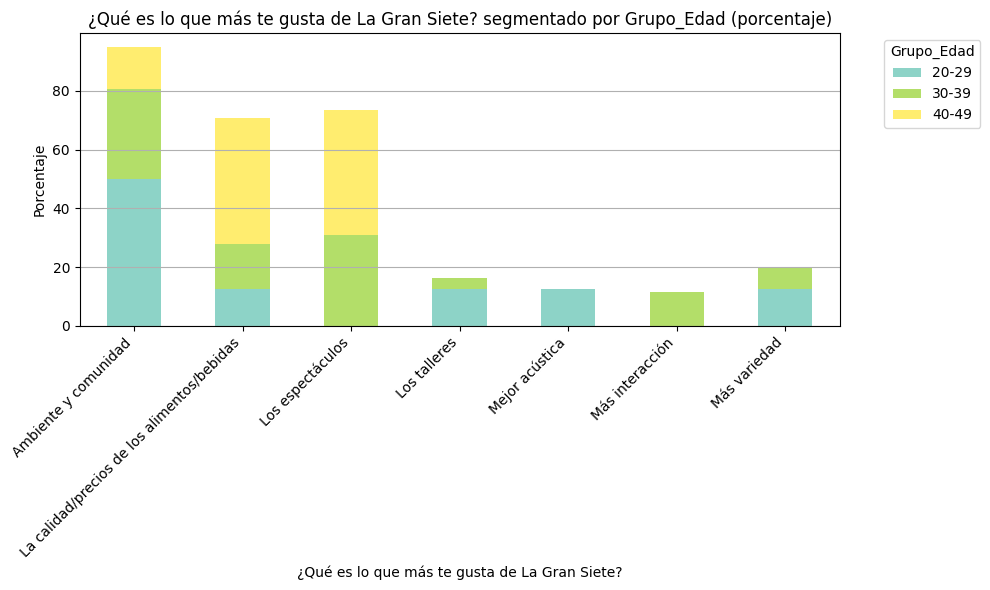

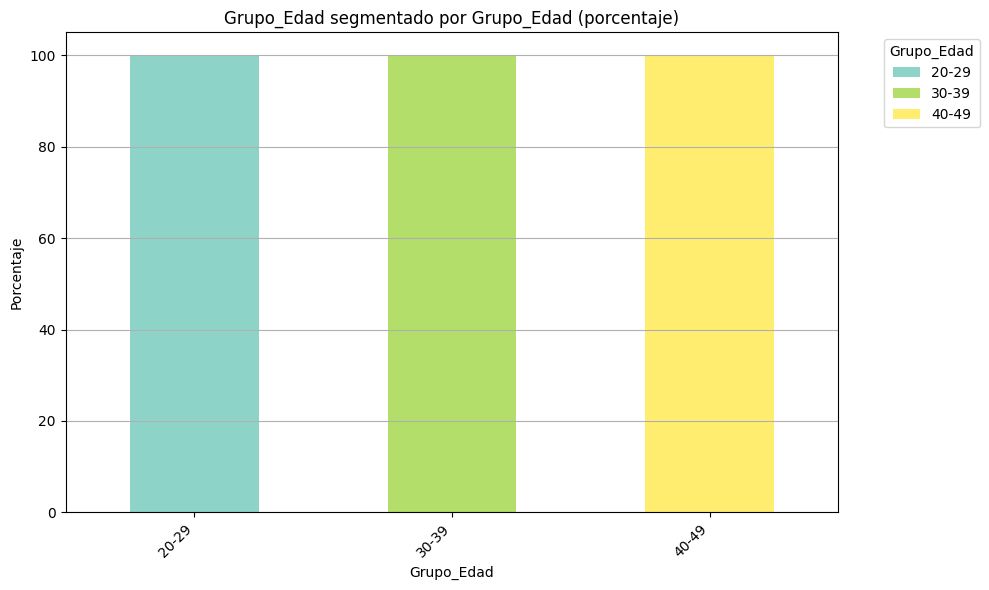

In [14]:
for col in df_clean.columns:
    # Tabla cruzada con porcentajes por grupo etario
    tabla = pd.crosstab(df_clean[col], df_clean['Grupo_Edad'], normalize='columns') * 100

    tabla.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
    plt.title(f"{col} segmentado por Grupo_Edad (porcentaje)")
    plt.xlabel(col)
    plt.ylabel("Porcentaje")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Grupo_Edad', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()
